### Pytorch 의 인덱싱과 슬라이싱

In [1]:
import torch

In [3]:
a = torch.tensor([1,2,3,4,5,6,7,8,9])
print(a[0])
print(a[-1])
print(a[1:4])
print(a[7:])
print(a[:7])
print(a[:])

tensor(1)
tensor(9)
tensor([2, 3, 4])
tensor([8, 9])
tensor([1, 2, 3, 4, 5, 6, 7])
tensor([1, 2, 3, 4, 5, 6, 7, 8, 9])


In [16]:
A = torch.tensor([[1,2,3],[4,5,6],[7,8,9]])
print(A[0]) # 하나만 쓰면 행에 대한 인덱싱
print(A[-1])
print(A[1:])
print(A[0][2])
print(A[0,2]) # <- 이건 리스트에선 안됨
print(A[1,:])
print(A[0, 0:3:2])
print(A[:,2]) # 모든행 , 2번째 열
print(A[:][2]) # A[:] <- A 에대해서 인덱싱 하겠다 (A[:] = A)
                # 그 A 중에서 [2] <=> A[2]

tensor([1, 2, 3])
tensor([7, 8, 9])
tensor([[4, 5, 6],
        [7, 8, 9]])
tensor(3)
tensor(3)
tensor([4, 5, 6])
tensor([1, 3])
tensor([3, 6, 9])
tensor([7, 8, 9])


In [19]:
A = torch.tensor([ [[0,1,2,3], [4,5,6,7], [8,9,10,11]],
                   [[12,13,14,15], [16,17,18,19], [20,21,22,23]],])

print(A)
print(A.shape)
print(A[0,1,2])
a = torch.tensor([[1,2,3,4]])
print(a.shape) # 대괄호가 하나 늘어나면 왼쪽에 shape 값이 추가 된다


tensor([[[ 0,  1,  2,  3],
         [ 4,  5,  6,  7],
         [ 8,  9, 10, 11]],

        [[12, 13, 14, 15],
         [16, 17, 18, 19],
         [20, 21, 22, 23]]])
torch.Size([2, 3, 4])
tensor(6)
torch.Size([1, 4])


### 고급 인덱싱

In [21]:
# 리스트로 인덱싱
print(A)
A[[0,1,1,0],[0,1,2,1],[3,3,2,1]]
# => [(0,0,3),(1,1,3),(1,2,2),(0,1,1)]

tensor([[[ 0,  1,  2,  3],
         [ 4,  5,  6,  7],
         [ 8,  9, 10, 11]],

        [[12, 13, 14, 15],
         [16, 17, 18, 19],
         [20, 21, 22, 23]]])


tensor([ 3, 19, 22,  5])

In [41]:
#boolean 인덱싱
a = [1,2,3,4,5,3,3]
print(a==3) # 여러개 값 들어있는 리스트 랑 3이 같나? -> 다름
A = torch.tensor([[1,2,3,4],[5,3,7,3]])
print(A>3) # 리스트와 달리 각 성분에 대해 비교해서 결과값을 줌
print(A[A>3]) # True, False 가 담긴 행렬로 인덱싱 가능

A[A>3] = 100
print(A) # 3보다 큰 애들을 100으로 바꾸는 작업도 가능함
         # for 문 쓰지 않고 처리할 수 있다는 것이 참 좋네요
A = torch.tensor([[1,2],[3,4],[5,6],[7,8]])
B = torch.tensor([True, False, True, False]) # 그냥 리스트 여도 상관 X
print(A[B,:])
b = torch.tensor([1,2,3,4])
print(b[[True,False,True,False]])
c = [1,2,3,4]
# c[[True,True,False,False]] <- 에러

False
tensor([[False, False, False,  True],
        [ True, False,  True, False]])
tensor([4, 5, 7])
tensor([[  1,   2,   3, 100],
        [100,   3, 100,   3]])
tensor([[1, 2],
        [5, 6]])
tensor([1, 3])


tensor(3)
tensor([3])
tensor([3, 4, 5])
tensor([[3, 3, 3],
        [4, 4, 4]])
tensor([[2, 2, 2],
        [3, 3, 3]])
tensor([1, 2, 3])
tensor([[1, 2, 3],
        [1, 2, 3],
        [1, 2, 3]])
tensor([[[1, 2, 3],
         [4, 5, 6]],

        [[1, 2, 3],
         [4, 5, 6]]])
torch.Size([2, 2, 3])


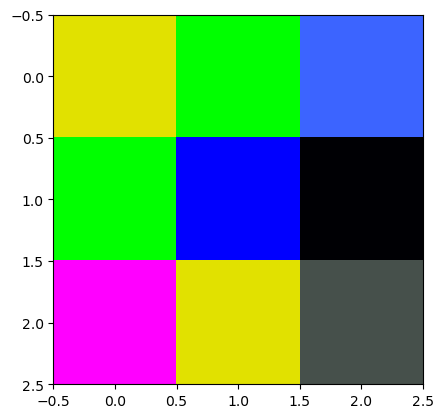

In [57]:
# tensor 로 인덱싱
a = torch.tensor([1,2,3,4,5])
A = a[2]
print(A)
A = a[ torch.tensor([2])]
print(A)
A = a[ torch.tensor([2,3,4])]
print(A)
A = a[ torch.tensor([[2,2,2],[3,3,3]])]
print(A) # 인덱싱 된 애들로 새로운 행렬을 구성

a = torch.tensor([1,2,3])
print(a[torch.tensor([[1,1,1],[2,2,2]])]) # 리스트로 인덱싱 하는것과 다르다

a = torch.tensor([[1,2,3],[4,5,6]])
print(a[torch.tensor(0)])
print(a[torch.tensor([0,0,0])]) # <- [a[0],a[0],a[0]]
A = a[torch.tensor([[0,1],[0,1]])] # [[a[0],a[1]],[a[0],a[1]] = 2 * 2 * 3 -> 2행 3열 짜리가 2개 있는 것
print(A)
print(A.shape)

# 이런건 어디다가 쓰는것일까?
# segmentation 결과 그림을 보여줄 때 사용!
# 구분한 obejct 를 나타낼 때 특정 색깔로 바꿔서 출력 해줘야 함 (r, g, b)
b = torch.tensor([[225,225,0],[0,255,0],[0,0,255],[255,0,255],[70,80,75],[0,0,4],[60,100,255]])
import matplotlib.pyplot as plt
plt.imshow(b[torch.tensor([[0,1,6],[1,2,5],[3,0,4]])])


In [66]:
# 문제
a = torch.tensor([[1,2,3],[4,5,6]])

A = a[torch.tensor([[0,1],[1,1]])]
# A 와 같은 것을 리스트 인덱싱을 통해 얻으려면?

# B = a[
#   [[[0,0,0],[0,1,2]],
#    [[1,1,1],[0,1,2]]],
#
#   [[[1,1,1],[0,1,2]],
#    [[1,1,1],[0,1,2]]]
# ]

B = a[ [[[0,0,0],[1,1,1]], [[1,1,1],[1,1,1]]],
    [[[0,1,2],[0,1,2]],[[0,1,2],[0,1,2]]]]
print(A)
print(B)

# 어우 복잡해



tensor([[[1, 2, 3],
         [4, 5, 6]],

        [[4, 5, 6],
         [4, 5, 6]]])
tensor([[[1, 2, 3],
         [4, 5, 6]],

        [[4, 5, 6],
         [4, 5, 6]]])


### 정리

In [77]:
A = torch.tensor([[1,2,6],[3,4,7],[5,6,2],[7,8,9]])
print(A)
print(A.shape)

#1. A[i, j] <-> A[i][j] : i번째 행 , j 번째 열의 값
print(A[0,1])
# 2-1. A[[몇 번째 행인가],[몇번째 열인가]]
print(A[[0,2,3,1,2],[1,1,2,0,0]])
# 2-2 A[ [[행],[행]] [[열],[열]] ]
print(A[ [[0,1],[2,3]],[[1,1],[0,0]]])
# 3. A [ tensor(bool) ] => true 인 element값 만 반환 -> 이때 bool 의 shape 은 A 와 같음
print(A[ torch.tensor([[True,False,True],[False,True,False],[True,False,True],[False,True,False]])])
print(A == 2) # => 각 요소마다 비교해서 boolean 값 반환 이때 shape 은 비교 행렬과 같음
# 4. A[몇 번째 값에 True 가 있냐, 몇 번째 값에 True 가 있냐]
print(A[[True,False,True,False],[False,True,True]])
# 5. A[ tensor ] => 몇 번째 것을 어떻게 쌓을것인가
print(A [ torch.tensor([1,1,2,2,2])])

tensor([[1, 2, 6],
        [3, 4, 7],
        [5, 6, 2],
        [7, 8, 9]])
torch.Size([4, 3])
tensor(2)
tensor([2, 6, 9, 3, 5])
tensor([[2, 4],
        [5, 7]])
tensor([1, 6, 4, 5, 2, 8])
tensor([[False,  True, False],
        [False, False, False],
        [False, False,  True],
        [False, False, False]])
tensor([2, 2])
tensor([[3, 4, 7],
        [3, 4, 7],
        [5, 6, 2],
        [5, 6, 2],
        [5, 6, 2]])
